# Project Holly
Survey analysis.

In [105]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [111]:
image_directory="images/"
image_extension="png"

def save_figure(fig, filename):
    filepath = image_directory + filename + "." + image_extension
    fig.savefig(filepath)
    
def increase_axes(chart):
    chart.set_xlabel(
        chart.get_xlabel(), 
        fontsize='large'
    )
    chart.set_ylabel(
        chart.get_ylabel(), 
        fontsize='large'
    )

def rotate_xlabels(chart):
    chart.set_xticklabels(
        chart.get_xticklabels(), 
        rotation=45, 
        horizontalalignment='right',
        fontweight='light'
    )
    
def create_countplot(data, x, save, order=[], ax=None):
    if not ax:
        fig, ax = plt.subplots();
        
    if not order:
        chart = sns.countplot(ax=ax, data=data, x=x);
    else:
        chart = sns.countplot(ax=ax, data=data, x=x, order=order);
        
    rotate_xlabels(chart);
    increase_axes(chart);
    if save:
        save_figure(chart.get_figure(), x);
        plt.show()
    return chart;
    
def create_histogram(data, name, save, ax=None):
    if not ax:
        fig, ax = plt.subplots();

    chart = sns.histplot(ax=ax, data=data)
    increase_axes(chart);
    if save:
        save_figure(chart.get_figure(), name)
        plt.show()
    return chart;

def anova_analysis(sample_df, variable, value):
    # Create ANOVA backbone table
    data = [['Between Groups', '', '', ''], ['Within Groups', '', '', ''], ['Total', '', '', '', '', '', '']] 
    anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
    anova_table.set_index('Source of Variation', inplace = True)

    # calculate SSTR and update anova table
    x_bar = sample_df[value].mean()
    SSTR = sample_df.groupby(variable).count() * (sample_df.groupby(variable).mean() - x_bar)**2
    anova_table['SS']['Between Groups'] = SSTR[value].sum()

    # calculate SSE and update anova table
    SSE = (sample_df.groupby(variable).count() - 1) * sample_df.groupby(variable).std()**2
    anova_table['SS']['Within Groups'] = SSE[value].sum()

    # calculate SSTR and update anova table
    SSTR = SSTR[value].sum() + SSE['Score'].sum()
    anova_table['SS']['Total'] = SSTR

    # update degree of freedom
    anova_table['df']['Between Groups'] = sample_df[variable].nunique() - 1
    anova_table['df']['Within Groups'] = sample_df.shape[0] - sample_df[variable].nunique()
    anova_table['df']['Total'] = sample_df.shape[0] - 1

    # calculate MS
    anova_table['MS'] = anova_table['SS'] / anova_table['df']

    # calculate F 
    F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
    anova_table['F']['Between Groups'] = F

    # p-value
    anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

    # F critical 
    alpha = 0.05
    # possible types "right-tailed, left-tailed, two-tailed"
    tail_hypothesis_type = "two-tailed"
    if tail_hypothesis_type == "two-tailed":
        alpha /= 2
    anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

    # Final ANOVA Table
    display(anova_table)
    
    conclusion = "Failed to reject the null hypothesis."
    if anova_table['P-value']['Between Groups'] <= alpha:
        conclusion = "Null Hypothesis is rejected."
    print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
    print(conclusion)
    
    return anova_table;

In [64]:
sns.set(font_scale=1.1)
NO_YES = ["No", "Yes"]

# Data Preparation

In [65]:
survey_data = pd.read_csv("clean_survey_data.csv");
[n_rows, n_cols] = survey_data.shape # rows & columns
display(n_rows, n_cols)

122

45

In [66]:
display(survey_data.isnull().sum()) # display null values

Progress                                   0
Duration (in seconds)                      0
Finished                                   0
Age_Range                                  0
Gender                                     0
Degree                                     0
Income                                     0
Employment                                 0
Job_Type                                   0
Industry_Manufacturing                     0
Industry_Automobile                        0
Industry_Construction                      0
Technology_VR                              0
Technology_AR                              0
Technology_MR                              0
Used                                      21
Use_Cases                                 54
Use_Cases_Other                          122
Effective_Channel_LinkedIn                 0
Effective_Channel_FB_IG                    0
Effective_Channel_Google                   0
Effective_Channel_YouTube                  0
Effective_

In [67]:
# replace nulls with 0 in numeric fields
#replace_nulls_cols = ['Spend_Insurance', 'Spend_Food', 'Spend_Boarding', 'Spend_Grooming']
#survey_data[replace_nulls_cols] = survey_data[replace_nulls_cols].fillna(0)

# display(survey_data.isnull().sum()) # display missing values

# Visualize the Data

## Demographics
What is your age range? <br>
What is your gender? <br>
What is the highest degree you have completed? <br>
What is your household income? <br>
What is your employment status? <br>
What would you consider yourself? 

In [68]:
display(survey_data["Degree"].unique())

array(['Graduate degree or higher', 'Bachelor’s degree or equivalent',
       'High school graduate or equivalent (GED)',
       'Associate degree or equivalent'], dtype=object)

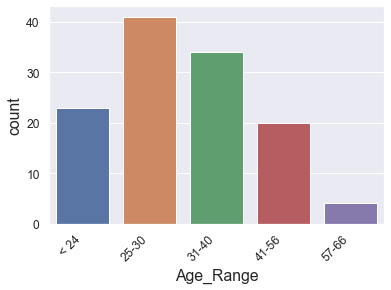

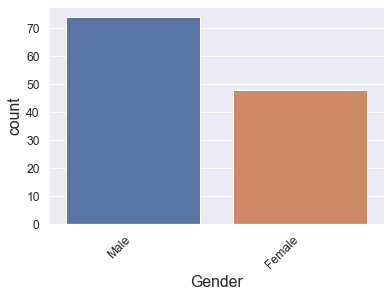

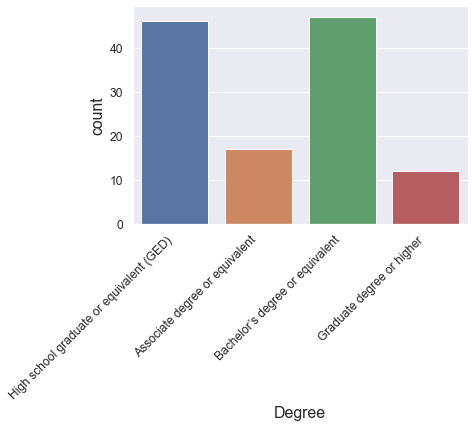

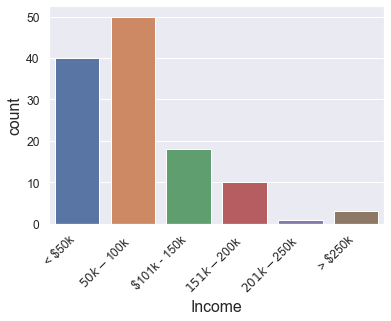

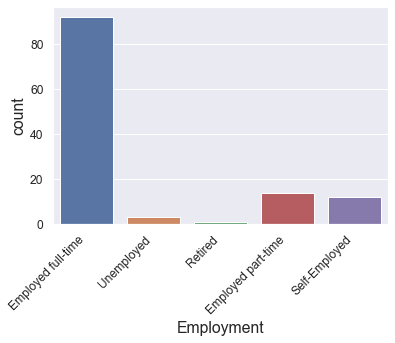

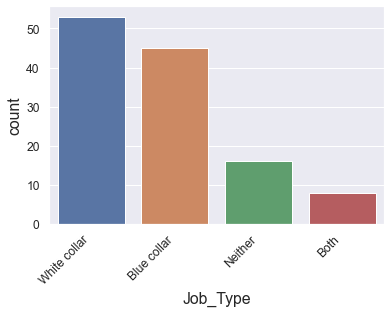

In [69]:
# Age_Range                                  0
# Gender                                     0
# Degree                                     0
# Income                                     0
# Employment                                 0
# Job_Type                                   0
order_age = ["< 24", "25-30", "31-40", "41-56", "57-66"]
create_countplot(survey_data, "Age_Range", True, order_age);
create_countplot(survey_data, "Gender", True);

order_degree = [
    'High school graduate or equivalent (GED)',
    'Associate degree or equivalent',
    'Bachelor’s degree or equivalent',
    'Graduate degree or higher'
        ]
create_countplot(survey_data, "Degree", True, order_degree);

order_income = [
    '< $50k', 
    '$50k - $100k', 
    '$101k - 150k',   
    '$151k - $200k', 
    '$201k - $250k',
    '> $250k'
]
create_countplot(survey_data, "Income", True, order_income);
create_countplot(survey_data, "Employment", True);
create_countplot(survey_data, "Job_Type", True);

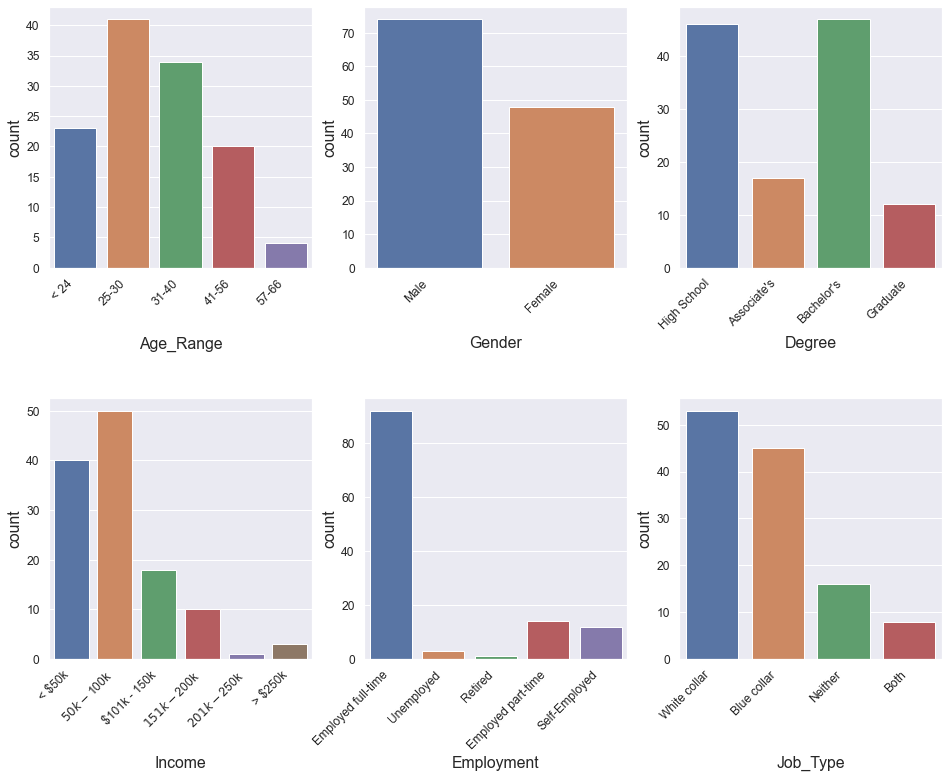

In [70]:
fig, axes = plt.subplots(2,3, figsize=(16,12));
create_countplot(survey_data, "Age_Range", False, order_age, ax=axes[0][0]);
create_countplot(survey_data, "Gender", False, ax=axes[0][1]);
chart = create_countplot(survey_data, "Degree", False, order_degree, ax=axes[0][2]);
axes[0][2].set_xticklabels(["High School", "Associate's", "Bachelor's", "Graduate"], rotation=45)
create_countplot(survey_data, "Income", False, order_income, ax=axes[1][0]);
create_countplot(survey_data, "Employment", False, ax=axes[1][1]);
create_countplot(survey_data, "Job_Type", False, ax=axes[1][2]);
fig.align_xlabels(axes)
fig.subplots_adjust(hspace=0.5)
save_figure(fig, 'Demographics');

## Participant Industries
Are you in the manufacturing industry? <br>
Are you in the automobile industry? <br>
Are you in the construction industry?

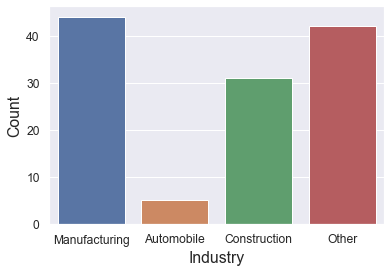

In [71]:
# Industry_Manufacturing                     0
# Industry_Automobile                        0
# Industry_Construction                      0
n_manufacturing = (survey_data["Industry_Manufacturing"]=="Yes").sum()
n_automotive = (survey_data["Industry_Automobile"]=="Yes").sum()
n_construction = (survey_data["Industry_Construction"]=="Yes").sum()
n_other = n_rows - n_manufacturing - n_automotive - n_construction

x = ["Manufacturing", "Automobile", "Construction", "Other"]
y = [n_manufacturing, n_automotive, n_construction, n_other]

chart = sns.barplot(x=x, y=y)
chart.set_xlabel("Industry");
chart.set_ylabel("Count");
increase_axes(chart)
save_figure(chart.get_figure(), "Industry")

## Technologies Used
Rate how familiar you are with the following technology?

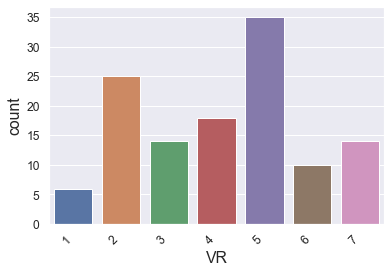

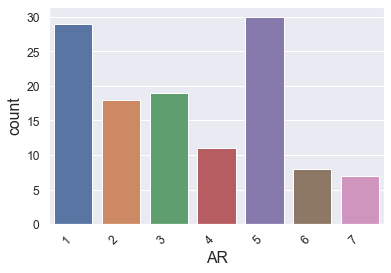

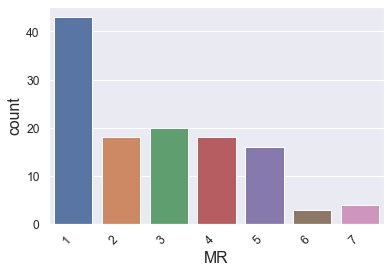

In [82]:
# Technology_VR                              0
# Technology_AR                              0
# Technology_MR                              0
technology = pd.DataFrame(columns=["VR", "AR", "MR"])
technology["VR"] = survey_data["Technology_VR"].replace(to_replace={
    '^1.*$': 1,
    '^2.*$': 2,
    '^3.*$': 3,
    '^4.*$': 4,
    '^5.*$': 5,
    '^6.*$': 6,
    '^7.*$': 7
}, regex=True)
create_countplot(technology, "VR", True);

technology["AR"] = survey_data["Technology_AR"].replace(to_replace={
    '^1.*$': 1,
    '^2.*$': 2,
    '^3.*$': 3,
    '^4.*$': 4,
    '^5.*$': 5,
    '^6.*$': 6,
    '^7.*$': 7
}, regex=True)
create_countplot(technology, "AR", True);

technology["MR"] = survey_data["Technology_MR"].replace(to_replace={
    '^1.*$': 1,
    '^2.*$': 2,
    '^3.*$': 3,
    '^4.*$': 4,
    '^5.*$': 5,
    '^6.*$': 6,
    '^7.*$': 7
}, regex=True)
create_countplot(technology, "MR", True);

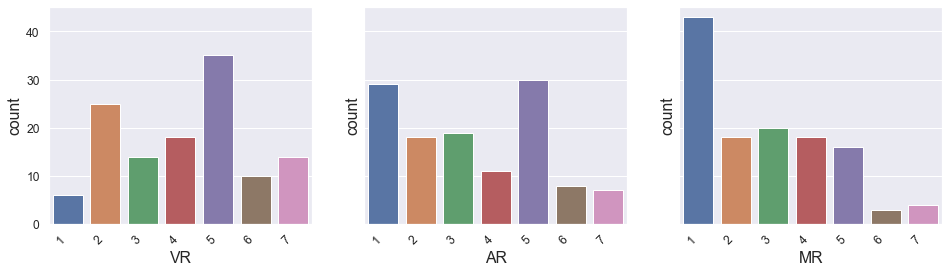

In [89]:
fig, axes = plt.subplots(1,3, figsize=(16,4), sharey=True);
create_countplot(technology, "VR", False, ax=axes[0]);
create_countplot(technology, "AR", False, ax=axes[1]);
create_countplot(technology, "MR", False, ax=axes[2]);
fig.align_xlabels(axes)
save_figure(chart.get_figure(), "Technologies")

,VR,AR,MR
count,122.000000,122.000000,122.000000
mean,4.122951,3.385246,2.762295
std,1.741937,1.887088,1.715526
min,1.000000,1.000000,1.000000
25%,2.250000,2.000000,1.000000
50%,4.000000,3.000000,2.500000
75%,5.000000,5.000000,4.000000
max,7.000000,7.000000,7.000000


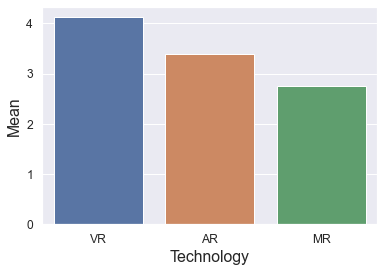

In [97]:
display(technology.describe());
means = technology.mean();

chart = sns.barplot(x=means.index, y=means);
chart.set_xlabel("Technology");
chart.set_ylabel("Mean");
increase_axes(chart)
save_figure(chart.get_figure(), "Technology_Means")

In [114]:
# Determine if the means are not the same
variable = "Technology"
value = "Score"
technology_combined = pd.melt(technology, var_name=variable, value_name=value)
anova_analysis(technology_combined, variable, value);

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,113.202,2,56.6011,17.8019,4.21474e-08,3.72662
Within Groups,1154.16,363,3.17949,None,None,None
Total,1267.36,365,3.47221,,,


F-score is: 17.80192746099272  and p value is: 4.214743964947587e-08
Null Hypothesis is rejected.


## Used Channels
Have you used any of the following (Check all that applies):

In [10]:
# Used                                      21

## Use Cases
Thinking about your workplace, can you see any of the following technologies having potential use cases? (Check all the applies)

In [11]:
# Use_Cases                                 54
# Use_Cases_Other                          122

## Effective Channels
If you are looking for certain products that could assist you in projects for your business/workplace, which of the following channels do you think would be most effective in finding you what you want: 

In [12]:
# Effective_Channel_LinkedIn                 0
# Effective_Channel_FB_IG                    0
# Effective_Channel_Google                   0
# Effective_Channel_YouTube                  0
# Effective_Channel_Trade_Show               0
# Effective_Channel_Webinar                  0
# Effective_Channel_Phone_Email              0
# Effective_Channel_Billboard                0
# Effective_Channel_Magazine                 0
# Effective_Channel_Television               0
# Effective_Channel_Radio                    0
# Effective_Channel_Website                  0

## Frequent Channels
If you are looking for certain products that could assist you in projects for your business/workplace, what platforms do you use most frequently when searching for products/solutions?

In [13]:
# Frequent_Channel_LinkedIn                  0
# Frequent_Channel__FB_IG                    0
# Frequent_Channel_Twitter                   0
# Frequent_Channel_Google                    0
# Frequent_Channel_YouTube                   0
# Frequent_Channel_Blogs                     0
# Frequent_Channel_Press                     0

## Previous Channels
Have you used any of the following platforms previously to search for products/solutions for your business/workplace? (Check all that applies)

In [14]:
# Previous_Channel                           5
# Previous_Channel_Other                   120

## Acquisition Channels
When it comes to high tech or software products, which of the follow channels do you prefer to acquire the products from?

In [15]:
# Acquisition_Channel_Website                0
# Acquisition_Channel_Online                 0
# Acquisition_Channel_Cloud_Marketplace      0
# Acquisition_Channel_Distributor            0
# Acquisition_Channel_SI_Consultant          0
# Acquisition_Channel_Retail                 0